# Used Car Price Dataset
A Dataset for Predicting Used Car Prices
url: https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset

About Dataset
🚗 Used Car Price Dataset: A dataset for predicting used car price 📊

Dive into the world of used cars with our dataset, perfect for predicting prices. It's a carefully selected set of data that car enthusiasts, analysts, and data scientists will find valuable. Whether you're curious or looking to analyze, this dataset is your guide to understanding the dynamics of how used cars are valued.

Key Features:

🛣️ Rich Attributes: Explore a number of attributes, including mileage, model year, fuel type, transmission, and more, providing a 360-degree view of each vehicle's specifications.
📉 Depreciation Insights: Uncover patterns in vehicle depreciation over time and across different makes and models, empowering you to make informed predictions about future price trends.
📱 Technological Integration: Seamlessly integrate our dataset into your predictive modeling pipelines, harnessing the power of technology to foresee changes in the used car market.
Potential Applications:

📈 Market Research: Conduct in-depth market research to identify trends, fluctuations, and hotspots in the used car industry.
🤖 Predictive Modeling: Build robust machine learning models to predict resale values, assisting buyers, sellers, and dealerships in making informed decisions.
🚀 Business Strategy: Inform business strategies for used car dealerships, insurance companies, and financial institutions by understanding the underlying factors influencing pricing.
How to Use:

🧑‍💻 Data Science Projects: Integrate this dataset into your data science projects to explore and analyze factors impacting used car prices.
🚀 Predictive Modeling: Train machine learning models to predict resale values based on historical data and a wide array of vehicle attributes.
🚗 Market Insights: Gain valuable insights into market dynamics, allowing you to stay ahead of trends and developments in the used car space.
Dataset Description:

1552 Rows, 15 Columns

Attributes:

car_name
registration_year
insurance_validity
fuel_type
seats
kms_driven
ownership
transmission
manufacturing_year
mileage(kmpl)
engine(cc)
max_power(bhp)
torque(Nm)
price(in lakhs)


Steps we plan to do:
1. Data Preprocessing
2. Data Visualization
3. Explarotary Data Analysis
4. Train-Test-Split
5. Model Creation
6. Model Prediction

## Step 1 - Importing, Exploring, and Preprocessing


In [72]:
import pandas as pd
import numpy as np


In [73]:
df = pd.read_csv('dataset/usedcardb.csv')
df.shape

(1553, 15)

In [74]:
df.head(3)

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

Based on the previous outputs, we need to first, drop the first column, 'Unnamed', as it is not usefull. Determine the columns with categorical values.

In [76]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75


Let's look for null values.

In [77]:
print(df.isna().sum().sort_values(ascending=False))
print("Total number of rows containing missing values is: ", df.isna().any(axis=1).sum())

torque(Nm)            4
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
price(in lakhs)       0
dtype: int64
Total number of rows containing missing values is:  4


As the number of missing values are less, we can easily drop the rows containg missing values.

In [78]:
df.dropna(inplace=True)
print(df.isna().sum().sort_values(ascending=False))
print("Total number of rows containing missing values is: ", df.isna().any(axis=1).sum())

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
engine(cc)            0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64
Total number of rows containing missing values is:  0


In [79]:
df.info(); df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1549 non-null   object 
 1   registration_year   1549 non-null   object 
 2   insurance_validity  1549 non-null   object 
 3   fuel_type           1549 non-null   object 
 4   seats               1549 non-null   int64  
 5   kms_driven          1549 non-null   int64  
 6   ownsership          1549 non-null   object 
 7   transmission        1549 non-null   object 
 8   manufacturing_year  1549 non-null   object 
 9   mileage(kmpl)       1549 non-null   float64
 10  engine(cc)          1549 non-null   float64
 11  max_power(bhp)      1549 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1549 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 181.5+ KB


,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


According to these outputs, we have several columns that contains values that are categorical. Now we need to take care of these categorical data so that in traing step we don't encouter problems. 

The following columns contain categorical values: ['car_name', 'registration_year', 'insurance_validity', 'fuel_type', 'ownership', 'transmission', 'manufacturing_year']

Among this list, the 'manufacturing_year' column can be easily changed to the numerical value. For the remaining, we choose 'One Hot Encodding' strategy to deal with.

In [80]:
df['manufacturing_year'].unique()

array(['2017', '2020', '2018', '2019', '2015', '2021', '2014', '2022',
       '2010', '2011', '2023', '2016', '2009', '2013', 'Power Steering',
       '2012', 'Power Windows Front', 'Air Conditioner', '2007'],
      dtype=object)

As the output suggest, there are some dirty data in this column, we delete these data and then choose a random year for that.

In [81]:
default_year = 2015
df['manufacturing_year'] = df['manufacturing_year'].apply(lambda x: default_year if not x.isdigit() else x)
df['manufacturing_year'].unique()

array(['2017', '2020', '2018', '2019', '2015', '2021', '2014', '2022',
       '2010', '2011', '2023', '2016', '2009', '2013', 2015, '2012',
       '2007'], dtype=object)

Now that we have a homogenous data in the column, we convert it to int type.

In [82]:
df['manufacturing_year'] = df['manufacturing_year'].astype(int)
df['manufacturing_year'].info()

<class 'pandas.core.series.Series'>
Index: 1549 entries, 0 to 1552
Series name: manufacturing_year
Non-Null Count  Dtype
--------------  -----
1549 non-null   int64
dtypes: int64(1)
memory usage: 24.2 KB


Now there are other categorical columns: ['car_name', 
'registration_year', 
'insurance_validity', 
'fuel_type', 
'ownership', '
transmission'
]

that we need to take care of. Let's start with the first one, the 'car_name'.
    

In [83]:
len(df['car_name'].unique())


923

well, as the number of unique value for this columns is high, this columns' values cannot affect the model output too much. Hence, for simplicity, we can either easily remove this column from the data that we wish to train, or we use a usefull method for the transformation. For this category we use the Frequency Encoding method. 

It Replace each category with the frequency of its occurrence in the dataset. This method preserves the information about the frequency of each category but avoids the high dimensionality problem.

In [84]:
frequency_map = df['car_name'].value_counts(normalize=True)

# Map frequencies to categories
df['car_name_enc'] = df['car_name'].map(frequency_map)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1549 non-null   object 
 1   registration_year   1549 non-null   object 
 2   insurance_validity  1549 non-null   object 
 3   fuel_type           1549 non-null   object 
 4   seats               1549 non-null   int64  
 5   kms_driven          1549 non-null   int64  
 6   ownsership          1549 non-null   object 
 7   transmission        1549 non-null   object 
 8   manufacturing_year  1549 non-null   int64  
 9   mileage(kmpl)       1549 non-null   float64
 10  engine(cc)          1549 non-null   float64
 11  max_power(bhp)      1549 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1549 non-null   float64
 14  car_name_enc        1549 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 193.6+ KB


In [85]:
df['car_name_enc'].nunique()

11

Now, we can remove the car_name column as we have its encoded column. We do the drops at the end of columns' tranformations. Let's take a look at the 'registration_year' column.

In [86]:
print("The number of unique values for the 'registration_year' column is: ", df['registration_year'].nunique())

frequency_map = df['registration_year'].value_counts(normalize=True)
# Map frequencies to categories
df['registration_year_enc'] = df['registration_year'].map(frequency_map)

print("The number of unique values for the 'registration_year_enc' column is: ", df['registration_year_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'registration_year' column is:  176
The number of unique values for the 'registration_year_enc' column is:  29 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_name               1549 non-null   object 
 1   registration_year      1549 non-null   object 
 2   insurance_validity     1549 non-null   object 
 3   fuel_type              1549 non-null   object 
 4   seats                  1549 non-null   int64  
 5   kms_driven             1549 non-null   int64  
 6   ownsership             1549 non-null   object 
 7   transmission           1549 non-null   object 
 8   manufacturing_year     1549 non-null   int64  
 9   mileage(kmpl)          1549 non-null   float64
 10  engine(cc)             1549 non-null   float64
 11  max_power(bhp)         1549 non-null   float64
 12  torque(Nm)     

We continue this method for the remaining categorical columns.

In [87]:
print("The number of unique values for the 'insurance_validity' column is: ", df['insurance_validity'].nunique())

frequency_map = df['insurance_validity'].value_counts(normalize=True)
# Map frequencies to categories
df['insurance_validity_enc'] = df['insurance_validity'].map(frequency_map)

print("The number of unique values for the 'insurance_validity_enc' column is: ", df['insurance_validity_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'insurance_validity' column is:  6
The number of unique values for the 'insurance_validity_enc' column is:  5 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  to

In [88]:
print("The number of unique values for the 'fuel_type' column is: ", df['fuel_type'].nunique())

frequency_map = df['fuel_type'].value_counts(normalize=True)
# Map frequencies to categories
df['fuel_type_enc'] = df['fuel_type'].map(frequency_map)

print("The number of unique values for the 'fuel_type_enc' column is: ", df['fuel_type_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'fuel_type' column is:  4
The number of unique values for the 'fuel_type_enc' column is:  4 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  torque(Nm)          

In [89]:
print("The number of unique values for the 'ownsership' column is: ", df['ownsership'].nunique())

frequency_map = df['ownsership'].value_counts(normalize=True)
# Map frequencies to categories
df['ownsership_enc'] = df['ownsership'].map(frequency_map)

print("The number of unique values for the 'ownsership_enc' column is: ", df['ownsership_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'ownsership' column is:  22
The number of unique values for the 'ownsership_enc' column is:  7 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  torque(Nm)       

In [90]:
print("The number of unique values for the 'transmission' column is: ", df['transmission'].nunique())

frequency_map = df['transmission'].value_counts(normalize=True)
# Map frequencies to categories
df['transmission_enc'] = df['transmission'].map(frequency_map)

print("The number of unique values for the 'transmission_enc' column is: ", df['transmission_enc'].nunique(), '\n\n')

df.info()

The number of unique values for the 'transmission' column is:  13
The number of unique values for the 'transmission_enc' column is:  7 


<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_name                1549 non-null   object 
 1   registration_year       1549 non-null   object 
 2   insurance_validity      1549 non-null   object 
 3   fuel_type               1549 non-null   object 
 4   seats                   1549 non-null   int64  
 5   kms_driven              1549 non-null   int64  
 6   ownsership              1549 non-null   object 
 7   transmission            1549 non-null   object 
 8   manufacturing_year      1549 non-null   int64  
 9   mileage(kmpl)           1549 non-null   float64
 10  engine(cc)              1549 non-null   float64
 11  max_power(bhp)          1549 non-null   float64
 12  torque(Nm)   

We the 'Frequency Encoding' method, we have not only remove the large unique values, but also we have transformed the categorical values to numerical values rangning between 0 and 1. 

Now, firstly, let's drop the categorical columns as we don't need them anymore and then continue toward the second step.

In [91]:
df = df.drop(['car_name', 'registration_year', 'insurance_validity', 'fuel_type', 'ownsership', 'transmission'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seats                   1549 non-null   int64  
 1   kms_driven              1549 non-null   int64  
 2   manufacturing_year      1549 non-null   int64  
 3   mileage(kmpl)           1549 non-null   float64
 4   engine(cc)              1549 non-null   float64
 5   max_power(bhp)          1549 non-null   float64
 6   torque(Nm)              1549 non-null   float64
 7   price(in lakhs)         1549 non-null   float64
 8   car_name_enc            1549 non-null   float64
 9   registration_year_enc   1549 non-null   float64
 10  insurance_validity_enc  1549 non-null   float64
 11  fuel_type_enc           1549 non-null   float64
 12  ownsership_enc          1549 non-null   float64
 13  transmission_enc        1549 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 181.5 

Having a normalized values is important. So in the next step we will first explore our data visually and then we decide whether the data needs further pre-processing or not.

## Step 2 - Data Visualization

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

Before jumping into the visualization step, first we need to check for the columns, their values and the way that we can illustrate them. To do so, we first check what columns we have:

In [94]:
print(df.columns, '\n')
print(df.info())

Index(['seats', 'kms_driven', 'manufacturing_year', 'mileage(kmpl)',
       'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)',
       'car_name_enc', 'registration_year_enc', 'insurance_validity_enc',
       'fuel_type_enc', 'ownsership_enc', 'transmission_enc'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seats                   1549 non-null   int64  
 1   kms_driven              1549 non-null   int64  
 2   manufacturing_year      1549 non-null   int64  
 3   mileage(kmpl)           1549 non-null   float64
 4   engine(cc)              1549 non-null   float64
 5   max_power(bhp)          1549 non-null   float64
 6   torque(Nm)              1549 non-null   float64
 7   price(in lakhs)         1549 non-null   float64
 8   car_name_enc            1549 non-null   float64
 9   registra

### Columns Description in Detail
- seats
    - This column likely represents the number of seats available in the car.

- kms_driven
    - It denotes the total distance the car has been driven, typically measured in kilometers.

- manufacturing_year
    - This column indicates the year in which the car was manufactured.

- mileage(kmpl)
    - It represents the fuel efficiency of the car, measured in kilometers per liter (kmpl).

- engine(cc)
    - This column denotes the engine displacement of the car, typically measured in cubic centimeters (cc).

- max_power(bhp)
    - It indicates the maximum power output of the car's engine, usually measured in brake horsepower (bhp).

- torque(Nm)
    - This column likely represents the torque output of the car's engine, typically measured in Newton-meters (Nm).

- price(in lakhs)
    - It denotes the price of the car, usually measured in lakhs of the local currency (e.g., Indian Rupees).

- car_name_enc
    - This column might represent an encoded version of the car's name for machine learning purposes.

- registration_year_enc
    - It could be an encoded representation of the registration year of the car.

- insurance_validity_enc
    - This column might represent an encoded version of the insurance validity status of the car.

- fuel_type_enc
    - It could be an encoded representation of the type of fuel used by the car (e.g., petrol, diesel, hybrid, electric).

- ownsership_enc
    - This column might represent an encoded version of the ownership status of the car (e.g., first owner, second owner).

- transmission_enc
    - It could be an encoded representation of the type of transmission used by the car (e.g., manual, automatic).

Now that we have become aware of the columns of the dataset, it's time to figure out the correlations between the columns to visualize them more easily.

To understand the correlation between columns in your dataset, you can calculate the correlation coefficient between pairs of columns. The correlation coefficient helps you understand the strength and direction of the linear relationship between two variables. In Python, you can use the Pandas library to compute the correlation coefficient.

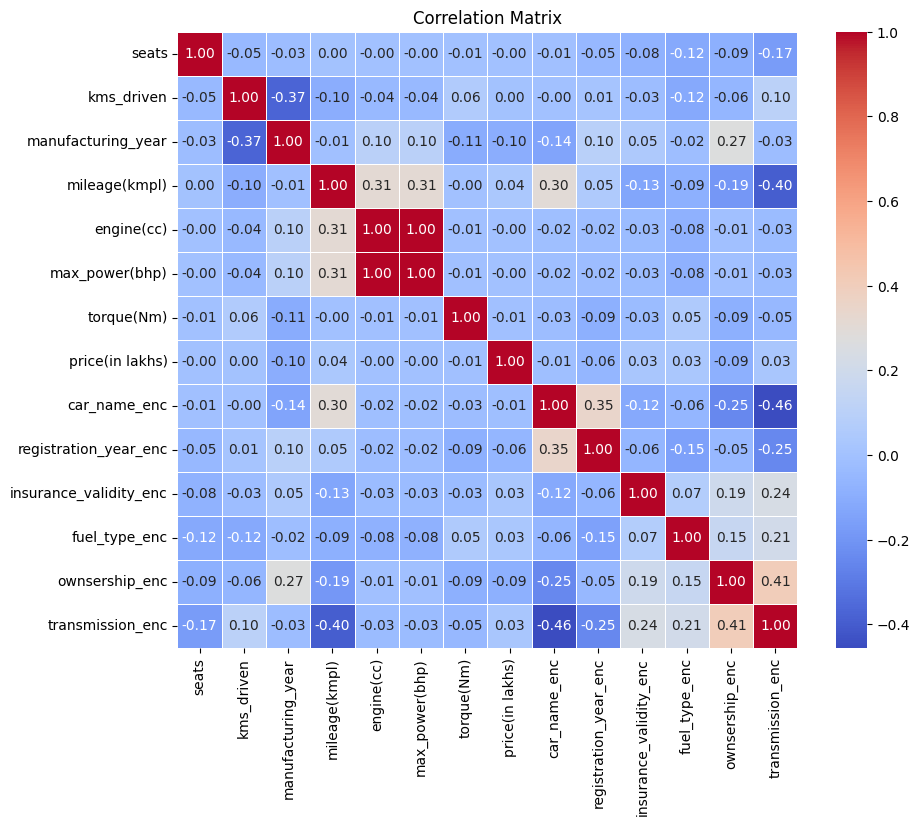

In [104]:
correlation_matrix = df.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix will show pairwise correlations between these columns, where values close to 1 or -1 indicate strong positive or negative correlations respectively, and values close to 0 indicate weak or no correlation.

As a Feature Selection processs we can consider which features are most relevant for our analysis or predictive model. We might want to focus on the columns that have higher correlations with the Price column as it is our target variable, or features that are strongly correlated with each other. However, we skip this part and maintain the whole dataset.

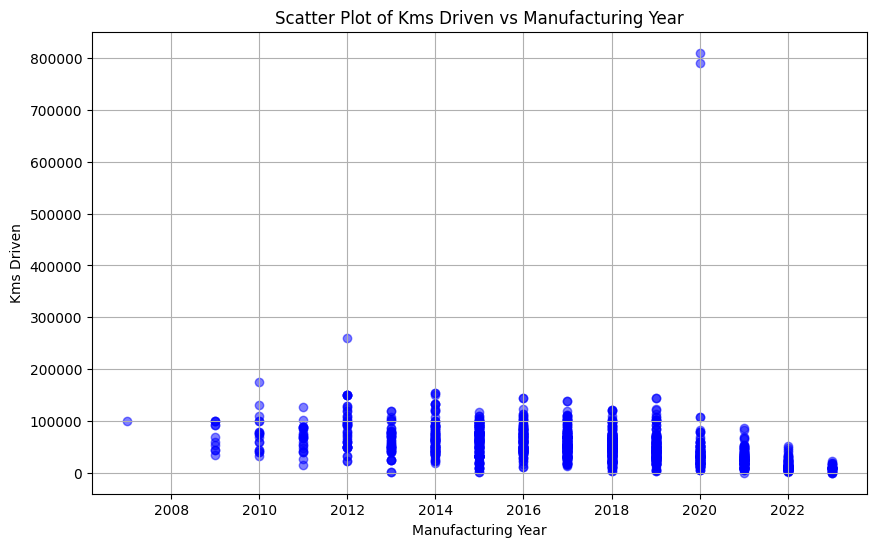

In [96]:
# Extracting 'kms_driven' and 'manufacturing_year' columns
kms_driven = df['kms_driven']
manufacturing_year = df['manufacturing_year']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(manufacturing_year, kms_driven, color='blue', alpha=0.5)  # alpha sets transparencyplt.title('Scatter Plot of Kms Driven vs Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Kms Driven')
plt.grid(True)
plt.show()

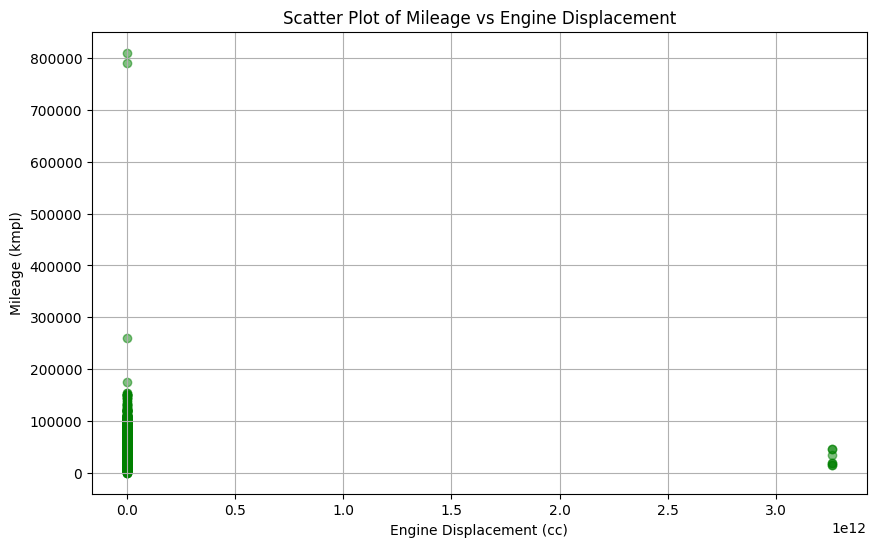

In [105]:
# Extracting 'mileage(kmpl)' and 'engine(cc)' columns
mileage = df['kms_driven']
engine_cc = df['engine(cc)']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(engine_cc, mileage, color='green', alpha=0.5)  # alpha sets transparency
plt.title('Scatter Plot of Mileage vs Engine Displacement')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Mileage (kmpl)')
plt.grid(True)
plt.show()

## Step 3 - Exploratory Data Analysis  

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process. It involves examining and summarizing key characteristics of the dataset to better understand its structure, patterns, and relationships between variables. Here are the main components typically included in an EDA section:

1. **Data Summary**: Begin by getting an overview of the dataset. This includes examining the dimensions of the dataset (number of rows and columns) and previewing a sample of the data to understand its format and structure.

2. **Descriptive Statistics**: Calculate summary statistics such as mean, median, mode, standard deviation, minimum, maximum, and quartiles for numerical variables. For categorical variables, you can calculate frequencies and proportions for each category.

3. **Data Visualization**: Create visual representations of the data to identify patterns and relationships. Common types of visualizations used in EDA include histograms, box plots, scatter plots, line plots, bar plots, and heatmaps.

4. **Univariate Analysis**: Analyze individual variables one at a time. For numerical variables, examine their distribution, central tendency, and variability. For categorical variables, explore the frequency distribution of categories.

5. **Bivariate Analysis**: Explore relationships between pairs of variables. This includes examining correlations between numerical variables using correlation matrices or scatter plots, and comparing distributions of numerical variables across different categories of categorical variables using box plots or violin plots.

6. **Multivariate Analysis**: Investigate relationships involving three or more variables simultaneously. This may involve creating multi-dimensional visualizations or using advanced statistical techniques like clustering or factor analysis.

7. **Handling Missing Values**: Identify missing values in the dataset and decide how to handle them. This may involve imputation (replacing missing values with estimated values) or removing rows or columns with a high proportion of missing values.

8. **Outlier Detection**: Identify outliers, which are data points that deviate significantly from the rest of the dataset. Explore the potential reasons for outliers and decide whether to exclude them or transform the data to make it more robust to outliers.

9. **Feature Engineering**: Explore the creation of new variables or transformations of existing variables to better capture relationships in the data or improve model performance.

10. **Summarizing Insights**: Finally, summarize key findings and insights from the EDA process. Highlight any interesting patterns or relationships discovered, as well as any challenges or limitations of the dataset that may impact subsequent analysis or modeling.

Overall, the goal of Exploratory Data Analysis is to gain a deep understanding of the dataset, uncover patterns and relationships, and generate hypotheses for further investigation or modeling. It is an iterative process that often informs subsequent steps in the data analysis workflow.

For this project, we skip this part.

## Step 4 - Splitting, Model Creation, and Prediction

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Let's train some algorithm and models.

In [109]:
# Selecting features (X) and target variable (y)
X = df.drop(columns=['price(in lakhs)'])  # Features
y = df['price(in lakhs)']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Random Forest Regression

In [115]:
# Creating and training the Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared Score: -0.14524251448266745
Mean Squared Error: 33223239.218245402
Mean Absolute Error: 424.4583457037889


#### Gradient Boosting Regression (XGBoost)
XGBoost is a powerful gradient boosting library known for its efficiency and high performance in various machine learning tasks. It often provides competitive results compared to other algorithms like Random Forests or Support Vector Machines. Experiment with different hyperparameters and preprocessing techniques to optimize the performance of your model further.

In [116]:
# Creating and training the XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared Score: -0.5483192851459084
Mean Squared Error: 44916409.708961904
Mean Absolute Error: 534.559735372628


#### Support Vector Regression (SVR)
Support Vector Regression is particularly useful when dealing with non-linear relationships between features and the target variable. Experimenting with different kernel functions (such as 'linear', 'poly', or 'sigmoid') and tuning hyperparameters like C and gamma can help improve the performance of the SVR model on your dataset.

In [117]:
# Creating and training the Support Vector Regression (SVR) model
svr_regressor = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear data
svr_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared Score: -0.003420987506689288
Mean Squared Error: 29109027.199886844
Mean Absolute Error: 317.40529032328277


#### Lasso Regression
Lasso Regression is a type of linear regression that uses L1 regularization, which helps in feature selection by penalizing the absolute size of coefficients.

Lasso Regression can be particularly useful when dealing with datasets with many features, as it tends to shrink the coefficients of less important features to zero, effectively performing feature selection. Adjusting the alpha parameter allows you to control the strength of regularization. Experimenting with different values of alpha can help you find the optimal model for your dataset.

In [118]:
# Creating and training the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)  # Adjust alpha parameter for regularization strength
lasso_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lasso_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared Score: 0.02095771299107274
Mean Squared Error: 28401806.33773349
Mean Absolute Error: 629.6115120830065


##### Accuracy Notation
To calculate accuracy, we first need to define what "accuracy" means in the context of regression. Accuracy is a common evaluation metric for classification problems, where it represents the proportion of correctly classified instances out of the total number of instances. However, in regression, we typically use different evaluation metrics since we are predicting continuous values rather than discrete classes.

For regression tasks, commonly used evaluation metrics include:

Mean Squared Error (MSE): Measures the average of the squares of the errors between the predicted and actual values.
Mean Absolute Error (MAE): Measures the average of the absolute differences between the predicted and actual values.
R-squared (R2) Score: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
In the code snippets provided earlier, we already calculated the Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics. These metrics give us an indication of how well the model is performing in terms of prediction accuracy.

If you're interested in reporting a single metric for the overall performance of your regression model, you could consider using the R-squared (R2) score. The R-squared score ranges from 0 to 1, where 1 indicates perfect prediction accuracy and 0 indicates that the model does not explain any of the variance in the target variable better than the mean.

##### Negatuve R Score?
A negative R-squared value indicates that the model performs worse than a horizontal line fitting the data, meaning it might be performing poorly or making predictions worse than the mean value of the target variable.

There are several reasons why the R-squared value might be negative:

- Overfitting: The model may have overfit the training data, capturing noise rather than the underlying patterns in the data. This can lead to poor generalization performance on unseen data.
- Incorrect Model Selection: The chosen model may not be appropriate for the dataset. For instance, linear models might not capture non-linear relationships well, leading to poor performance and negative R-squared values.
- Inadequate Features: The features used to train the model may not be sufficient to capture the underlying relationships in the data. Adding more relevant features or engineering new ones might help improve model performance.
- Hyperparameter Tuning: The model's hyperparameters may not be optimized effectively. Tuning hyperparameters using techniques like grid search or randomized search could help improve model performance.
Here are some steps you can take to address negative R-squared values:

- Model Evaluation: Review the model's performance on the training and validation datasets. If the model is overfitting, consider reducing model complexity or using regularization techniques to prevent overfitting.
- Feature Selection and Engineering: Evaluate the relevance and importance of features used in the model. You may need to select more informative features or engineer new features that better capture the underlying relationships in the data.
- Hyperparameter Tuning: Experiment with different hyperparameter settings for the model. For example, adjust regularization parameters, kernel functions (for SVM), or the number of estimators (for Random Forest and XGBoost) to improve model performance.
- Model Selection: Consider trying different algorithms or ensemble methods that might better suit your dataset and target variable. Not all algorithms perform equally well on all datasets, so exploring different options could lead to better results.
By iteratively refining your model and evaluating its performance, you can work towards improving the R-squared value and overall predictive accuracy of your model.